In [1]:
import copy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv('Datasets/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

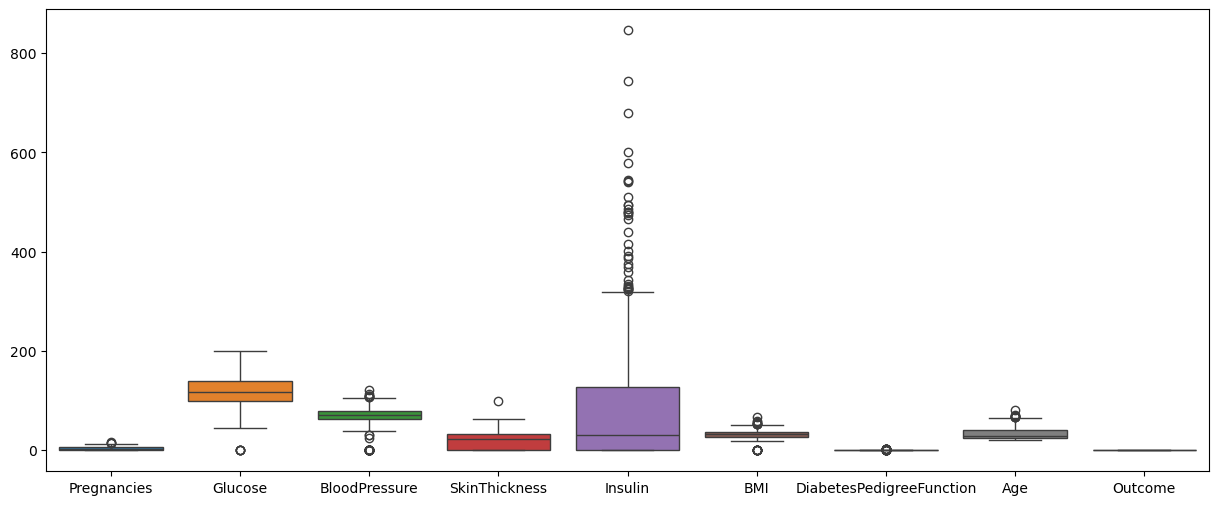

In [5]:
plt.figure(figsize=(15,6))
sns.boxplot(data)

In [6]:
# Cleaning
clean_data = data.copy()
clean_data = clean_data.replace('?', pd.NA).apply(pd.to_numeric)
clean_data.replace(-1, pd.NA, inplace=True)
clean_data.fillna(clean_data.mean(numeric_only=True), inplace=True)

In [64]:
# There exist features with zeros, when its not biologically possible
invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
# To deal with this, the zeros shall be replaced with mean of the column
for col in invalid_zeros:
    clean_data.replace({col: 0}, pd.NA, inplace=True)
    mean = clean_data[col].mean(skipna=True)
    clean_data.fillna({col: mean}, inplace=True)

In [51]:
# Removing outliers
num_col = clean_data.select_dtypes(include='number').columns
for col in num_col:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = (Q3-Q1)
    high = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR
    clean_data[col] = clean_data[col].astype(float)
    median = clean_data[col].median()
    clean_data.loc[(clean_data[col]<low) | (clean_data[col]>high), col] = median
    

In [52]:
clean_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.686763,72.130231,2.915342e+01,53.689779,32.119833,0.407303,32.032552,0.348958
std,3.270644,30.435949,10.874314,1.706414e-13,67.782164,6.284987,0.216130,10.082592,0.476951
min,0.000000,44.000000,40.000000,2.915342e+01,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,2.915342e+01,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,2.915342e+01,29.093750,32.400000,0.371094,29.000000,0.000000
75%,6.000000,140.250000,80.000000,2.915342e+01,100.000000,36.100000,0.549500,39.000000,1.000000
max,13.000000,199.000000,104.000000,2.915342e+01,250.000000,48.800000,1.001000,61.000000,1.000000


<Axes: >

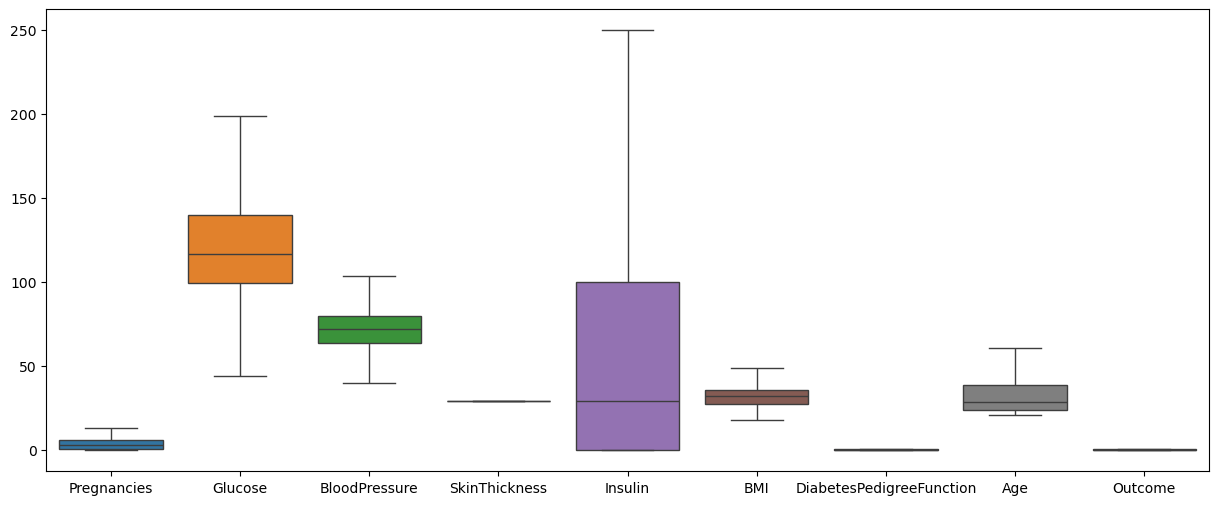

In [53]:
plt.figure(figsize=(15,6))
sns.boxplot(clean_data)

In [ ]:
sns.pairplot(clean_data, hue='Outcome')
plt.figure(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [55]:
def z_score_normalization(x, mean=None, std=None):
    if mean is None:
        mean = np.mean(x, axis=0)
    if std is None:
        std = np.std(x, axis=0)
    safe_std = np.where(std == 0, 1, std)
    x_norm = (x - mean)/safe_std
    return x_norm, mean, std

In [56]:
def sigmoid_fn(z):
    g_x = 1/(1+np.exp(-z))
    return g_x

In [57]:
def cost_fn(x, y, w, b):
    z = np.dot(x, w) + b
    f_x = sigmoid_fn(z)
    f_x = np.clip(f_x, 1e-10, 1 - 1e-10)
    loss = -y*(np.log(f_x)) - (1-y)*(np.log(1 - f_x))
    cost = np.mean(loss)
    return cost

In [58]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    z = np.dot(x, w) + b
    f_x = sigmoid_fn(z)
    error = f_x - y
    dw = (1/m) * (np.dot(x.transpose(), error))
    db = (1/m) * (np.sum(error))
    return dw, db

In [59]:
def compute_gradient_descent(x, y, w_i, b_i, learning_rate, epsilon = 1e-6, max_iter = 10000):
    i = 0
    w = copy.deepcopy(w_i)
    b = b_i
    prev_cost = float('inf')
    while True:
        dw, db = compute_gradient(x, y, w, b)
        gradient_norm = math.sqrt(np.sum(dw**2) + (db**2))
        cost = cost_fn(x, y, w, b)
        if (gradient_norm < epsilon) or (abs(prev_cost-cost) < epsilon):
            break;
        if i >= max_iter:
            break;
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 250 == 0:
            print(f'Iteration {i}: Cost = {cost}')
        prev_cost = cost
        i += 1
    return w, b

In [60]:
def predict(x, w, b):
    z = np.dot(x, w) + b
    f_x = sigmoid_fn(z)
    y_pred = (f_x > 0.5).astype(int)
    return y_pred

In [61]:
x = clean_data.drop(columns=['Outcome'])
y = clean_data['Outcome'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_train_norm, mean, std = z_score_normalization(x_train)
x_test_norm, _, _ = z_score_normalization(x_test, mean, std)

In [62]:
w_i = np.zeros(x_train_norm.shape[1])
b_i = 0
learning_rate = 0.05
w, b = compute_gradient_descent(x_train_norm, y_train, w_i, b_i, learning_rate)
final_cost = cost_fn(x_train_norm, y_train, w, b)
print(final_cost)
print(w, b)

Iteration 0: Cost = 0.6931471805599453
Iteration 250: Cost = 0.44811552581533676
Iteration 500: Cost = 0.44162860460721254
Iteration 750: Cost = 0.4407300126098294
0.44066491161068405
[-0.04217508  1.14059303 -0.0793693   0.          0.01713301  0.57731801
  0.31658068  0.68775497] -0.8981788833937717


In [63]:
y_pred = predict(x_test_norm, w, b)
accuracy = (np.mean(y_test == y_pred)) * 100
accuracy

72.39583333333334